# Part B: PCA

### 1. Principal Component Analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

Setup

In [10]:
RANDOM_STATE = 42
df = pd.read_csv('diabetes.csv')

Normalize the data

In [14]:
y = df.iloc[:, -1]
X = df.iloc[:, :-1]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

PCA

In [37]:
pca = PCA(random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X_scaled)

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance_ratio >= 0.80) + 1

Plot the cumulative explained variance by the PCA components

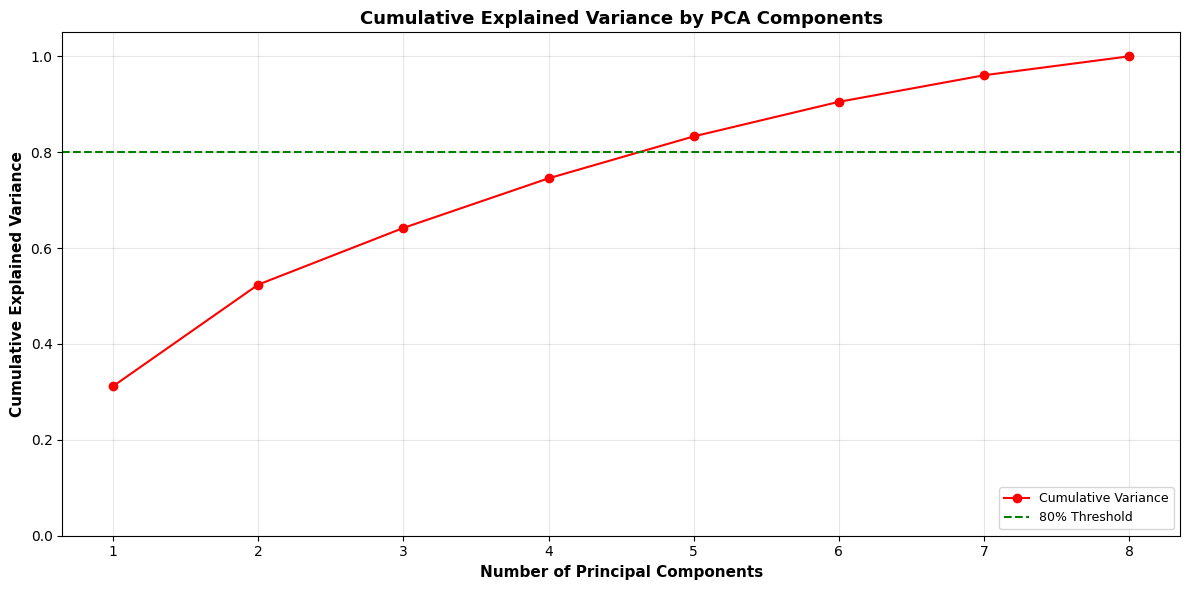

In [98]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1),
         cumulative_variance_ratio,
         marker='o', color='red', label='Cumulative Variance')

plt.axhline(y=0.80, color='green', linestyle='--', label='80% Threshold')

plt.xlabel('Number of Principal Components', fontsize=11, fontweight='bold')
plt.ylabel('Cumulative Explained Variance', fontsize=11, fontweight='bold')
plt.title('Cumulative Explained Variance by PCA Components', fontsize=13, fontweight='bold')
plt.ylim([0, 1.05])
plt.legend(loc='lower right', fontsize=9)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

Para explicar pelo menos 80% da variância total, 5 componentes principais devem ser retidos.

### 2. Class distribution

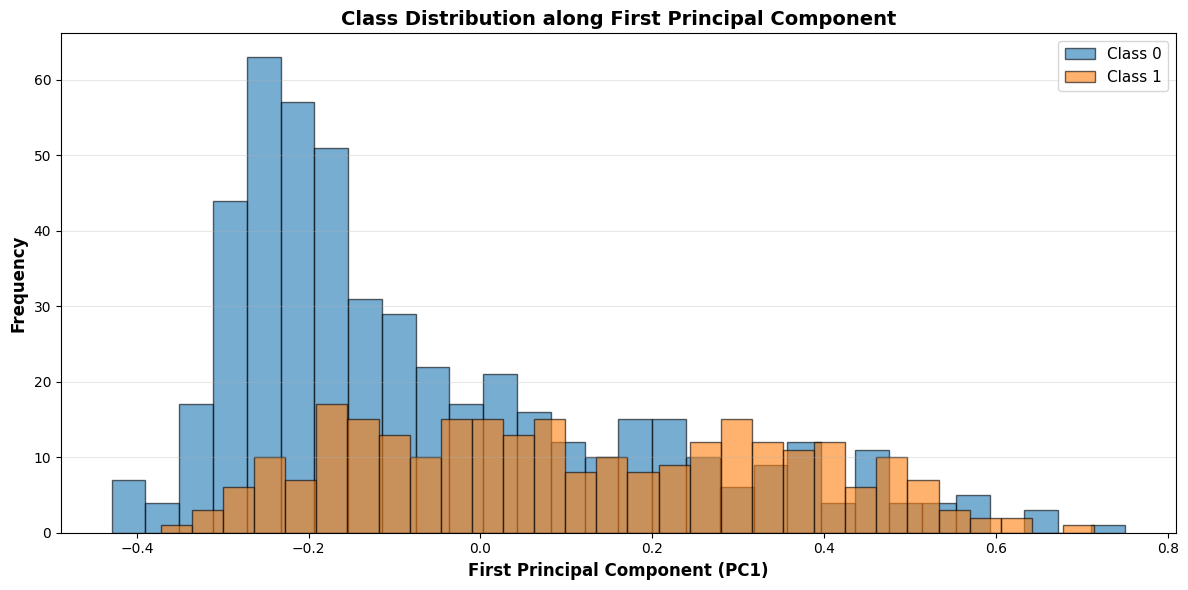

In [99]:
pc1_values = X_pca[:, 0]

plt.figure(figsize=(12, 6))

for class_label in np.unique(y):
    pc1_class = pc1_values[y == class_label]
    plt.hist(pc1_class, bins=30, alpha=0.6, label=f'Class {class_label}', edgecolor='black')

plt.xlabel('First Principal Component (PC1)', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Class Distribution along First Principal Component', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


Comment

In [57]:
pc1_class_0 = pc1_values[y == 0]
pc1_class_1 = pc1_values[y == 1]
print(f"Class 0: Média = {np.mean(pc1_class_0):.4f}, Desvio Padrão = {np.std(pc1_class_0):.4f}")
print(f"Class 1: Média = {np.mean(pc1_class_1):.4f}, Desvio Padrão = {np.std(pc1_class_1):.4f}")

print(f"Variância Explicada (PC1): {explained_variance_ratio[0]*100:.4f}%")

Class 0: Média = -0.0602, Desvio Padrão = 0.2389
Class 1: Média = 0.1123, Desvio Padrão = 0.2429
Variância Explicada (PC1): 31.1922%


A primeira componente principal (PC1) explica 31.1922% da 
variância total do conjunto de dados.

As distribuições de ambas as classes ao longo de PC1 apresentam uma 
sobreposição considerável, o que indica que PC1 sozinha não fornece uma separação 
clara entre pacientes diabéticos e não diabéticos. Embora PC1 capture a maior 
parte da variância nos dados, esta variância não está principalmente relacionada 
com a discriminação entre classes.

Isto sugere que múltiplas componentes principais devem ser utilizadas em conjunto 
para uma previsão eficaz de diabetes, uma vez que a informação discriminativa está 
distribuída por várias componentes em vez de concentrada apenas em PC1.

### 3. Linear Discriminant Analysis

Setup

In [63]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)
lda_values = X_lda[:, 0]

Plot the class distribution along the LDA component

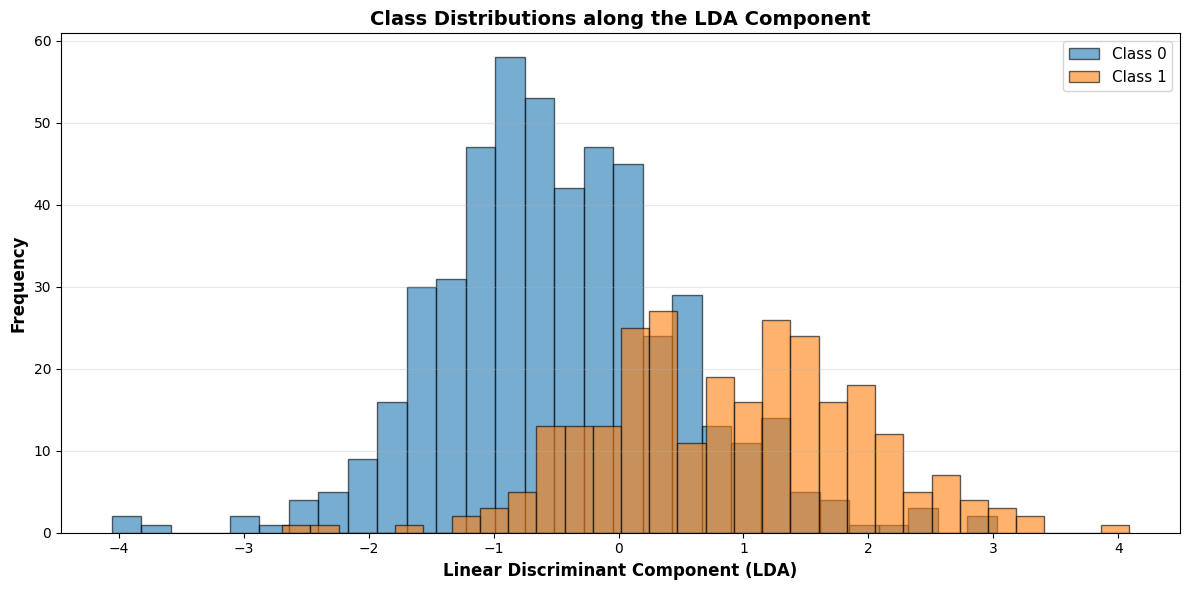

In [100]:
plt.figure(figsize=(12, 6))

for class_label in np.unique(y):
    lda_class = lda_values[y == class_label]
    plt.hist(lda_class, bins=30, alpha=0.6, label=f'Class {class_label}', edgecolor='black')

plt.xlabel('Linear Discriminant Component (LDA)', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Class Distributions along the LDA Component', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


Comment on the results

In [70]:
lda_class_0 = lda_values[y == 0]
lda_class_1 = lda_values[y == 1]
print(f"Classe 0: Média = {np.mean(lda_class_0):.4f}, Desvio Padrão = {np.std(lda_class_0):.4f}")
print(f"Classe 1: Média = {np.mean(lda_class_1):.4f}, Desvio Padrão = {np.std(lda_class_1):.4f}")

mean_diff_lda = abs(np.mean(lda_class_1) - np.mean(lda_class_0))
print(f"Diferença das Médias (LDA): {mean_diff_lda:.4f}")

Classe 0: Média = -0.4824, Desvio Padrão = 0.9772
Classe 1: Média = 0.8999, Desvio Padrão = 1.0376
Diferença das Médias (LDA): 1.3823


A Análise Discriminante Linear (LDA) é um método que procura a direção que maximiza a separação entre classes e minimiza a variância dentro de cada classe.

Os resultados mostram que a LDA conseguiu distinguir claramente as duas classes, com médias bem separadas (diferença de 1.3823) e dispersões relativamente semelhantes. Isto indica que a projeção obtida pela LDA capturou bem a informação discriminativa presente nos dados.

A separação observada demonstra que a LDA é eficaz para realçar diferenças entre grupos e reduzir a dimensionalidade de forma informada pelas classes. No entanto, alguma sobreposição ainda ocorre, o que sugere que há espaço de melhoria para a precisão da classificação.

### 4. PCA or LDA

In [88]:
pc1_class0, pc1_class1 = pc1_values[y == 0], pc1_values[y == 1]
lda_class0, lda_class1 = lda_values[y == 0], lda_values[y == 1]


Cohen's d

In [93]:
pc1_mean_diff = abs(np.mean(pc1_class1) - np.mean(pc1_class0))
pc1_pooled_std = np.sqrt((np.std(pc1_class0)**2 + np.std(pc1_class1)**2) / 2)
pc1_cohens_d = pc1_mean_diff / pc1_pooled_std

lda_mean_diff = abs(np.mean(lda_class1) - np.mean(lda_class0))
lda_pooled_std = np.sqrt((np.std(lda_class0)**2 + np.std(lda_class1)**2) / 2)
lda_cohens_d = lda_mean_diff / lda_pooled_std

print(f"Cohen's d (PC1): {pc1_cohens_d:.4f}")
print(f"Cohen's d (LDA): {lda_cohens_d:.4f}")

improvement = ((lda_cohens_d - pc1_cohens_d) / pc1_cohens_d) * 100
print(f"Melhoria da LDA em relação à PCA: {improvement:.1f}%")


Cohen's d (PC1): 0.7162
Cohen's d (LDA): 1.3716
Melhoria da LDA em relação à PCA: 91.5%


Overlap coefficient

In [90]:
from scipy import stats

x_range_pc1 = np.linspace(min(pc1_values), max(pc1_values), 1000)
kde_pc1_0, kde_pc1_1 = stats.gaussian_kde(pc1_class0), stats.gaussian_kde(pc1_class1)
pc1_overlap = np.trapezoid(np.minimum(kde_pc1_0(x_range_pc1), kde_pc1_1(x_range_pc1)), x_range_pc1)

x_range_lda = np.linspace(min(lda_values), max(lda_values), 1000)
kde_lda_0, kde_lda_1 = stats.gaussian_kde(lda_class0), stats.gaussian_kde(lda_class1)
lda_overlap = np.trapezoid(np.minimum(kde_lda_0(x_range_lda), kde_lda_1(x_range_lda)), x_range_lda)

print(f"Overlap Coefficient (PC1): {pc1_overlap:.4f}")
print(f"Overlap Coefficient (LDA): {lda_overlap:.4f}")


Overlap Coefficient (PC1): 0.6814
Overlap Coefficient (LDA): 0.5056


LDA é o método mais apropriado para construir uma regra discriminante neste caso. Razões:

1. Separação entre Classes
   - PCA: Cohen’s d = 0.7162
   - LDA: Cohen’s d = 1.3716

   A LDA apresenta uma separação 91.5% superior à do PCA, mostrando que as distribuições das classes estão mais afastadas e com menor sobreposição

2. Isto faz sentido pois o objetivo de cada método é diferente
   - PCA: maximiza a variância total dos dados, sem usar qualquer informação sobre as classes. No entanto, a direção de maior variância pode não coincidir com a que melhor distingue diabéticos de não diabéticos.

   - LDA: maximiza a razão entre a variância entre classes e a variância dentro das classes. Tem como propósito resolver problemas de classificação, procurando a direção que melhor separa as classes, o que é mais útil neste caso

3. A análise dos gráficos confirma isto

   Nos gráficos, as distribuições das classes na componente LDA apresentam menor sobreposição (0.5056) em comparação com a PC1 (0.6814), confirmando que a LDA gera uma separação mais clara e reduz o erro de classificação potencial.